# Q1. Implement the AlexNet architecture. Train, test and report the performance of this model on the Cats_and_Dogs_Dataset, Horse2Zebra Dataset

## CATS AND DOGS DATASET: -

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-28 20:20:24--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.217.2.112, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   308MB/s    in 0.2s    

2022-08-28 20:20:25 (308 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(227, 227),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [6]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [7]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.930.jpg', 'cat.649.jpg', 'cat.458.jpg', 'cat.205.jpg', 'cat.78.jpg', 'cat.901.jpg', 'cat.303.jpg', 'cat.732.jpg', 'cat.593.jpg', 'cat.687.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


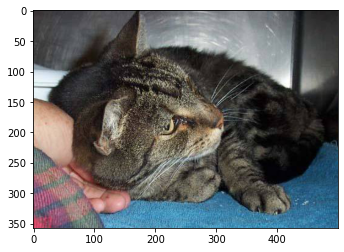

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0])))

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from keras.layers import LeakyReLU

In [10]:
alexNet = tf.keras.Sequential()

alexNet.add(tf.keras.Input(shape=[227, 227, 3]))
alexNet.add(tf.keras.layers.BatchNormalization(momentum  = 0.93, epsilon = 0.001))
alexNet.add(tf.keras.layers.Conv2D(filters = 96, kernel_size = 11, strides = 4, padding = "valid", kernel_regularizer = tf.keras.regularizers.l2(), name = "ConvLayer1"))
alexNet.add(tf.keras.layers.MaxPool2D(pool_size = 3, strides = 2, name = "MaxPoolLayer1"))
alexNet.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 5, strides = 1, activation = LeakyReLU(alpha=0.25), padding = "same", kernel_regularizer=tf.keras.regularizers.l2(), name = "ConvLayer2"))
alexNet.add(tf.keras.layers.MaxPool2D(pool_size = 3, strides = 2, name = "MaxPoolLayer2"))
alexNet.add(tf.keras.layers.BatchNormalization(momentum  = 0.93, epsilon = 0.001))
alexNet.add(tf.keras.layers.Conv2D(filters = 384, kernel_size = 3, strides = 1, activation = LeakyReLU(alpha=0.25), padding = "same", kernel_regularizer = tf.keras.regularizers.l2(), name = "ConvLayer3"))
alexNet.add(tf.keras.layers.Conv2D(filters = 384, kernel_size = 3, strides = 1, activation = LeakyReLU(alpha=0.25), padding = "same", kernel_regularizer = tf.keras.regularizers.l2(), name = "ConvLayer4"))
alexNet.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, strides = 1, activation = LeakyReLU(alpha=0.25), padding = "same", kernel_regularizer = tf.keras.regularizers.l2(), name = "ConvLayer5"))
alexNet.add(tf.keras.layers.MaxPool2D(pool_size = 3, strides = 2, name = "MaxPoolLayer3"))
alexNet.add(tf.keras.layers.Flatten())
alexNet.add(tf.keras.layers.BatchNormalization(momentum  = 0.93, epsilon = 0.001))
alexNet.add(tf.keras.layers.Dense(4096, activation = LeakyReLU(alpha=0.25), kernel_regularizer = tf.keras.regularizers.l2(), name = "HiddenLayer1"))
alexNet.add(tf.keras.layers.Dropout(0.8))
alexNet.add(tf.keras.layers.Dense(4096, activation = LeakyReLU(alpha=0.25), kernel_regularizer = tf.keras.regularizers.l2(), name = "HiddenLayer2"))
alexNet.add(tf.keras.layers.Dropout(0.6))
alexNet.add(tf.keras.layers.Dense(2, activation = "softmax", name = "OutputLayer"))
optmzr = tf.keras.optimizers.Adam(learning_rate = 0.0001)

alexNet.compile(loss = "categorical_crossentropy", optimizer = optmzr, metrics = ["accuracy"])
alexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 227, 227, 3)      12        
 ormalization)                                                   
                                                                 
 ConvLayer1 (Conv2D)         (None, 55, 55, 96)        34944     
                                                                 
 MaxPoolLayer1 (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 ConvLayer2 (Conv2D)         (None, 27, 27, 256)       614656    
                                                                 
 MaxPoolLayer2 (MaxPooling2D  (None, 13, 13, 256)      0         
 )                                                               
                                                        

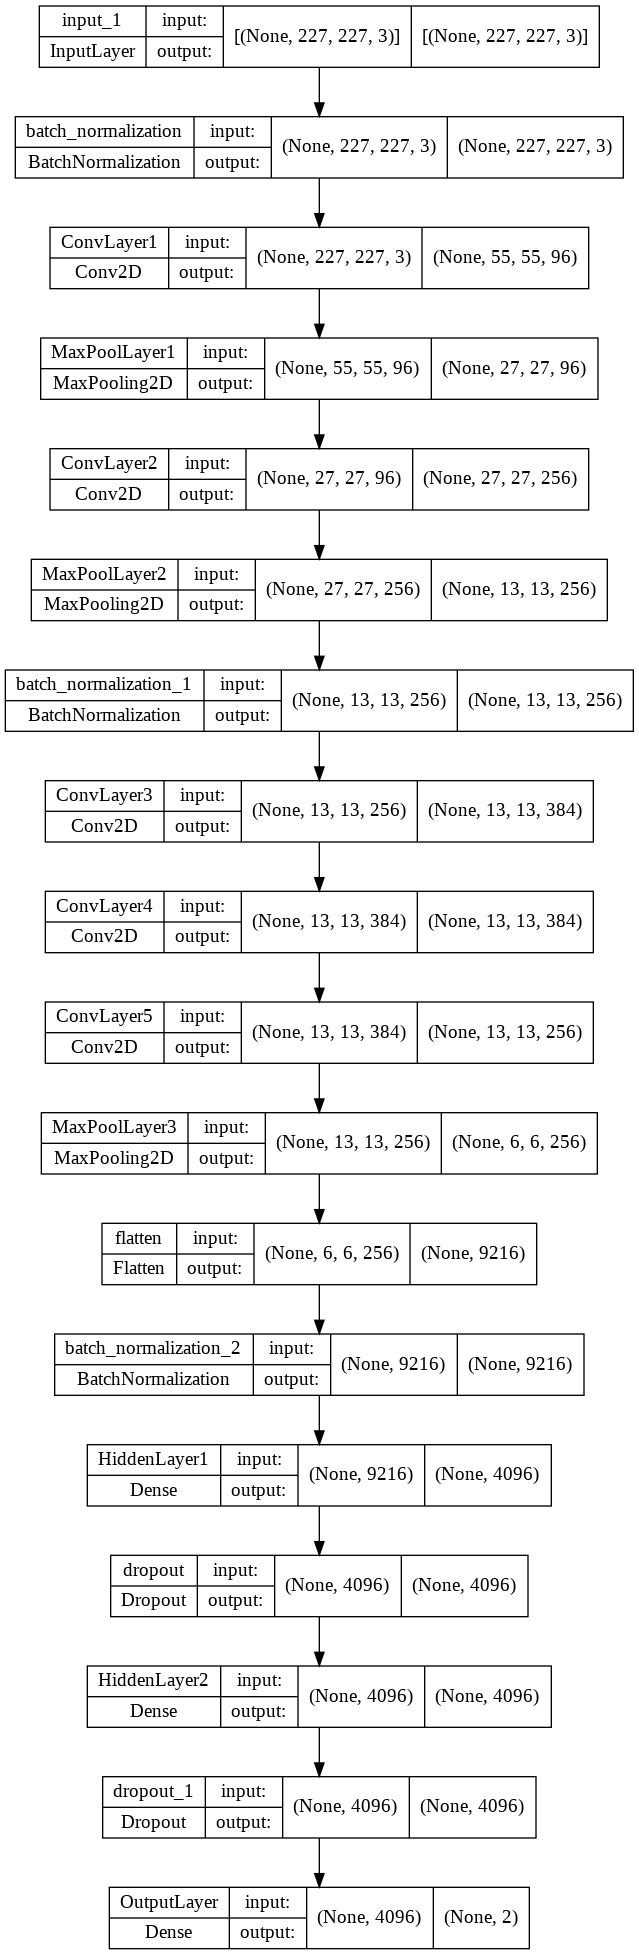

In [11]:
from tensorflow.keras.utils import plot_model

plot_model(alexNet,  show_shapes=True, show_layer_names=True)

In [13]:
history = alexNet.fit(train_generator, batch_size = 50, steps_per_epoch = 50, epochs = 35, validation_data = validation_generator)        # epochs = 50 | steps_per_epoch = 100

Epoch 1/35
50/50 [==============================] - 7s 139ms/step - loss: 91.7014 - accuracy: 0.6050 - val_loss: 89.4750 - val_accuracy: 0.6820
Epoch 2/35
50/50 [==============================] - 7s 137ms/step - loss: 89.3250 - accuracy: 0.6500 - val_loss: 87.6505 - val_accuracy: 0.6500
Epoch 3/35
50/50 [==============================] - 7s 136ms/step - loss: 87.2113 - accuracy: 0.6300 - val_loss: 85.2129 - val_accuracy: 0.6540
Epoch 4/35
50/50 [==============================] - 9s 179ms/step - loss: 85.2840 - accuracy: 0.5960 - val_loss: 83.3272 - val_accuracy: 0.6570
Epoch 5/35
50/50 [==============================] - 9s 180ms/step - loss: 83.2105 - accuracy: 0.6310 - val_loss: 81.9125 - val_accuracy: 0.6400
Epoch 6/35
50/50 [==============================] - 7s 139ms/step - loss: 81.1617 - accuracy: 0.6520 - val_loss: 79.6795 - val_accuracy: 0.6580
Epoch 7/35
50/50 [==============================] - 7s 138ms/step - loss: 79.1259 - accuracy: 0.6710 - val_loss: 77.8842 - val_accuracy:

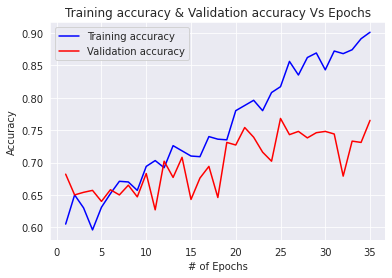

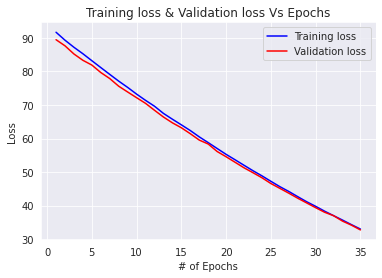

In [14]:
import seaborn as sb

sb.set_style("darkgrid")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy & Validation accuracy Vs Epochs')
plt.legend()

print("\n\n")

plt.figure()

#Train and validation loss

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.title('Training loss & Validation loss Vs Epochs')
plt.legend()

plt.show()

## HORSES AND ZEBRAS DATASET: -

In [19]:
import os
import zipfile

if not os.path.exists('./horse2zebra'):
  import gdown
  url = 'https://drive.google.com/uc?id=1jPelB2jzNZJq3ZU9Uk_Mkt4MJtF3DRgg'
  gdown.download(url, './horse2zebra.zip', quiet=False)
  !unzip ./horse2zebra.zip > /dev/null

Downloading...
From: https://drive.google.com/uc?id=1jPelB2jzNZJq3ZU9Uk_Mkt4MJtF3DRgg
To: /content/horse2zebra.zip
100%|██████████| 117M/117M [00:00<00:00, 136MB/s] 


In [20]:
import PIL.Image as Image
for root, dirs, files in os.walk('./horse2zebra'):
    if root.endswith('/train/A'):
        filenames_horses=files
    if root.endswith('/train/B'):
        filenames_zebras=files

filenames_horses_sort=sorted(filenames_horses)
filenames_zebras_sort=sorted(filenames_zebras)

horses_root='./horse2zebra/train/A'
zebras_root='./horse2zebra/train/B'

horses_train=[]
zebras_train=[]

for i in range(len(filenames_horses_sort)):
          horses_train.append(Image.open(os.path.join(horses_root, filenames_horses_sort[i])).convert('RGB'))

for i in range(len(filenames_zebras_sort)):
          zebras_train.append(Image.open(os.path.join(zebras_root, filenames_zebras_sort[i])).convert('RGB'))

train_dir = './horse2zebra/train'

In [21]:
for root, dirs, files in os.walk('./horse2zebra'):
    if root.endswith('/test/A'):
        filenames_horses=files
    if root.endswith('/test/B'):
        filenames_zebras=files

#Sort filenames
filenames_horses_sort=sorted(filenames_horses)
filenames_zebras_sort=sorted(filenames_zebras)

horses_root='./horse2zebra/test/A'
zebras_root='./horse2zebra/test/B'

horses_test=[]
zebras_test=[]

#Save all images
for i in range(len(filenames_horses_sort)):
          horses_test.append(Image.open(os.path.join(horses_root, filenames_horses_sort[i])).convert('RGB'))

for i in range(len(filenames_zebras_sort)):
          zebras_test.append(Image.open(os.path.join(zebras_root, filenames_zebras_sort[i])).convert('RGB'))

test_dir = './horse2zebra/test'

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(227, 227),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2401 images belonging to 2 classes.


In [24]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [53]:
alexNet_h2z = tf.keras.Sequential()

alexNet_h2z.add(tf.keras.Input(shape=[227, 227, 3]))
alexNet_h2z.add(tf.keras.layers.BatchNormalization(momentum  = 0.9, epsilon = 0.001))
alexNet_h2z.add(tf.keras.layers.Conv2D(filters = 96, kernel_size = 11, strides = 4, padding = "valid", kernel_regularizer = tf.keras.regularizers.l2(), name = "ConvLayer1"))
alexNet_h2z.add(tf.keras.layers.MaxPool2D(pool_size = 3, strides = 2, name = "MaxPoolLayer1"))
alexNet_h2z.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 5, strides = 1, activation = LeakyReLU(alpha=0.2), padding = "same", kernel_regularizer=tf.keras.regularizers.l2(), name = "ConvLayer2"))
alexNet_h2z.add(tf.keras.layers.MaxPool2D(pool_size = 3, strides = 2, name = "MaxPoolLayer2"))
alexNet_h2z.add(tf.keras.layers.BatchNormalization(momentum  = 0.9, epsilon = 0.001))
alexNet_h2z.add(tf.keras.layers.Conv2D(filters = 384, kernel_size = 3, strides = 1, activation = LeakyReLU(alpha=0.2), padding = "same", kernel_regularizer = tf.keras.regularizers.l2(), name = "ConvLayer3"))
alexNet_h2z.add(tf.keras.layers.Conv2D(filters = 384, kernel_size = 3, strides = 1, activation = LeakyReLU(alpha=0.2), padding = "same", kernel_regularizer = tf.keras.regularizers.l2(), name = "ConvLayer4"))
alexNet_h2z.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, strides = 1, activation = LeakyReLU(alpha=0.2), padding = "same", kernel_regularizer = tf.keras.regularizers.l2(), name = "ConvLayer5"))
alexNet_h2z.add(tf.keras.layers.MaxPool2D(pool_size = 3, strides = 2, name = "MaxPoolLayer3"))
alexNet_h2z.add(tf.keras.layers.Flatten())
alexNet_h2z.add(tf.keras.layers.BatchNormalization(momentum  = 0.9, epsilon = 0.001))
alexNet_h2z.add(tf.keras.layers.Dense(4096, activation = LeakyReLU(alpha=0.2), kernel_regularizer = tf.keras.regularizers.l2(), name = "HiddenLayer1"))
alexNet_h2z.add(tf.keras.layers.Dropout(0.5))
alexNet_h2z.add(tf.keras.layers.Dense(4096, activation = LeakyReLU(alpha=0.2), kernel_regularizer = tf.keras.regularizers.l2(), name = "HiddenLayer2"))
alexNet_h2z.add(tf.keras.layers.Dropout(0.3))
alexNet_h2z.add(tf.keras.layers.Dense(2, activation = "softmax", name = "OutputLayer"))
optmzr = tf.keras.optimizers.Adam(learning_rate = 0.0003)

alexNet_h2z.compile(loss = "categorical_crossentropy", optimizer = optmzr, metrics = ["accuracy"])
alexNet_h2z.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_27 (Bat  (None, 227, 227, 3)      12        
 chNormalization)                                                
                                                                 
 ConvLayer1 (Conv2D)         (None, 55, 55, 96)        34944     
                                                                 
 MaxPoolLayer1 (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 ConvLayer2 (Conv2D)         (None, 27, 27, 256)       614656    
                                                                 
 MaxPoolLayer2 (MaxPooling2D  (None, 13, 13, 256)      0         
 )                                                               
                                                      

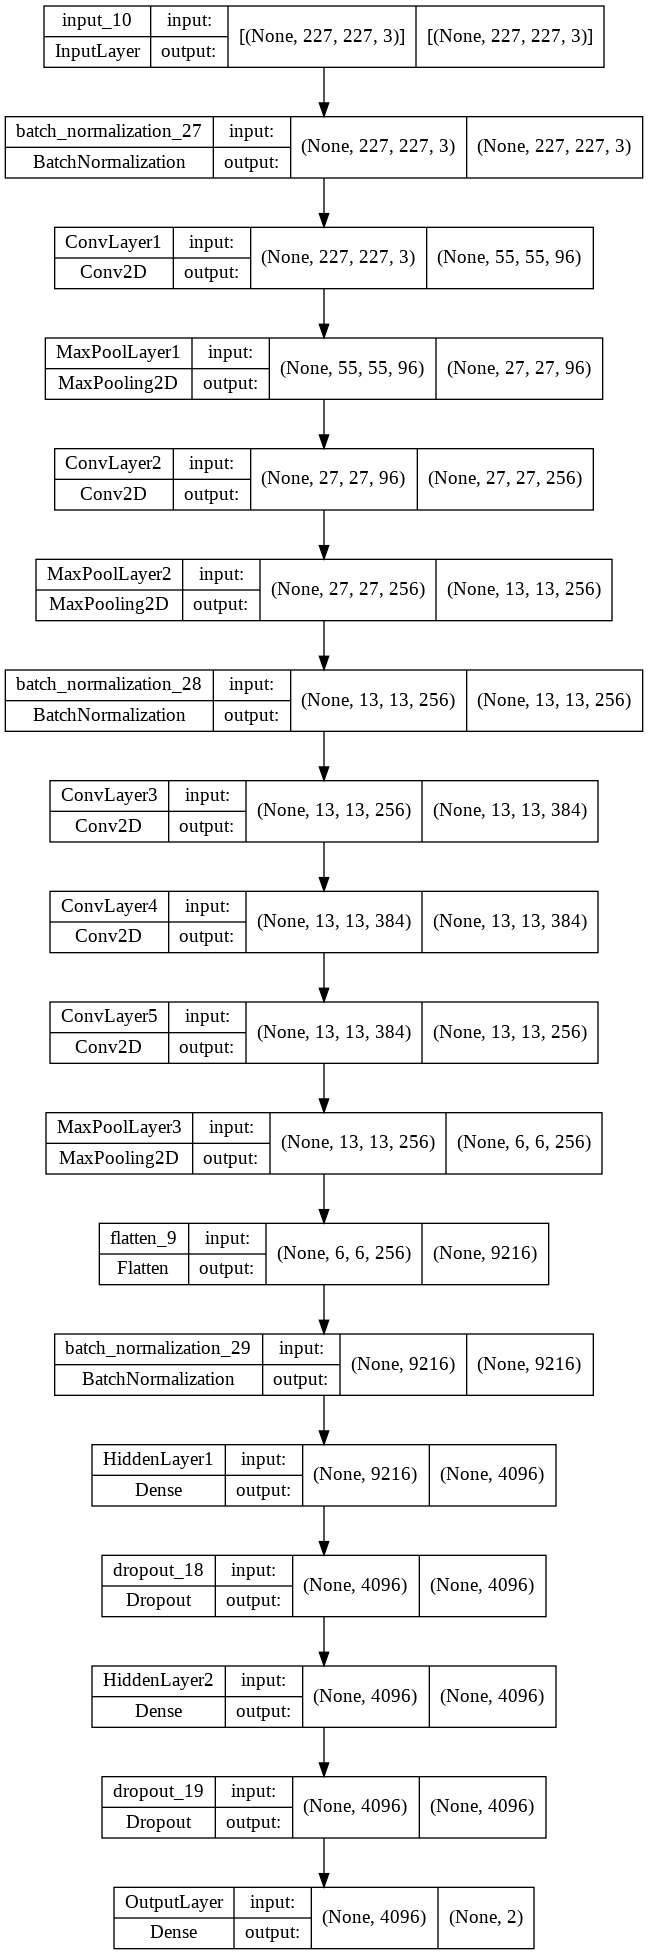

In [54]:
from tensorflow.keras.utils import plot_model

plot_model(alexNet_h2z,  show_shapes=True, show_layer_names=True)

In [55]:
history_h2z = alexNet_h2z.fit(train_generator, batch_size = 50, steps_per_epoch = 50, epochs = 20, validation_data = validation_generator)  # epochs = 50 | steps_per_epoch = 100

Epoch 1/20
50/50 [==============================] - 8s 132ms/step - loss: 103.1963 - accuracy: 0.7080 - val_loss: 92.1608 - val_accuracy: 0.4440
Epoch 2/20
50/50 [==============================] - 6s 126ms/step - loss: 83.5375 - accuracy: 0.7840 - val_loss: 75.8297 - val_accuracy: 0.4470
Epoch 3/20
50/50 [==============================] - 6s 127ms/step - loss: 67.6969 - accuracy: 0.8063 - val_loss: 61.3503 - val_accuracy: 0.4580
Epoch 4/20
50/50 [==============================] - 6s 128ms/step - loss: 54.4993 - accuracy: 0.8298 - val_loss: 49.2604 - val_accuracy: 0.4370
Epoch 5/20
50/50 [==============================] - 6s 128ms/step - loss: 43.6063 - accuracy: 0.8290 - val_loss: 39.5790 - val_accuracy: 0.4780
Epoch 6/20
50/50 [==============================] - 7s 143ms/step - loss: 34.4283 - accuracy: 0.8640 - val_loss: 34.0434 - val_accuracy: 0.5050
Epoch 7/20
50/50 [==============================] - 6s 128ms/step - loss: 27.3971 - accuracy: 0.8680 - val_loss: 25.1806 - val_accuracy

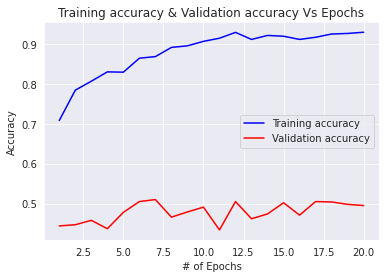

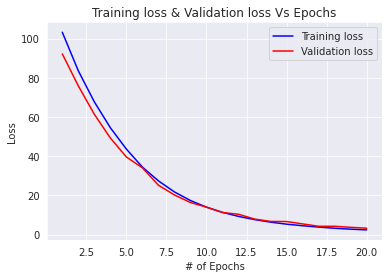

In [56]:
import seaborn as sb

sb.set_style("darkgrid")

acc_h2z = history_h2z.history['accuracy']
val_acc_h2z = history_h2z.history['val_accuracy']
loss_h2z = history_h2z.history['loss']
val_loss_h2z = history_h2z.history['val_loss']

epochs_h2z = range(1, len(acc_h2z) + 1)

#Train and validation accuracy

plt.plot(epochs_h2z, acc_h2z, 'b', label='Training accuracy')
plt.plot(epochs_h2z, val_acc_h2z, 'r', label='Validation accuracy')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy & Validation accuracy Vs Epochs')
plt.legend()

print("\n\n")

plt.figure()

#Train and validation loss

plt.plot(epochs_h2z, loss_h2z, 'b', label='Training loss')
plt.plot(epochs_h2z, val_loss_h2z, 'r', label='Validation loss')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.title('Training loss & Validation loss Vs Epochs')
plt.legend()

plt.show()

> **CONCLUSION:**

The AlexNet model is performing better in the Cats & Dogs dataset than in Horce & Zebra data set despite having less no.of training instances, But both the curves of both the models tell us they are overfitting